## Customer Clustering with KMeans

In [1]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
# Generate sample data for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# X now contains 300 rows of data spread across 4 clusters that was generated by the make_blobs function.
# In real life we would use an existing data set.

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [5]:
kmeans.cluster_centers_

array([[ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263]])

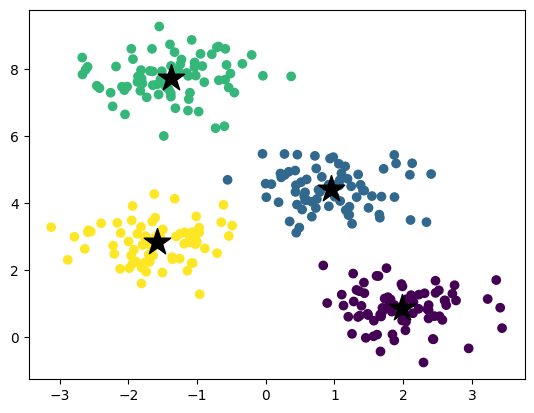

In [6]:
# Plot the clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=400, color='black')
plt.show()

## Examples

In [7]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/customers.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

In [8]:
df.sample(5)  # display 5 random rows from the dataframe

,Fresh_Food,Milk,Grocery,Frozen_Food
386,1206,3620,2857,1945
298,6758,4560,9965,934
262,23257,1372,1677,982
352,608,1106,1533,830
20,17546,4519,4602,1066


In [9]:
df.shape

(440, 4)

array([[<Axes: title={'center': 'Fresh_Food'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen_Food'}>]], dtype=object)

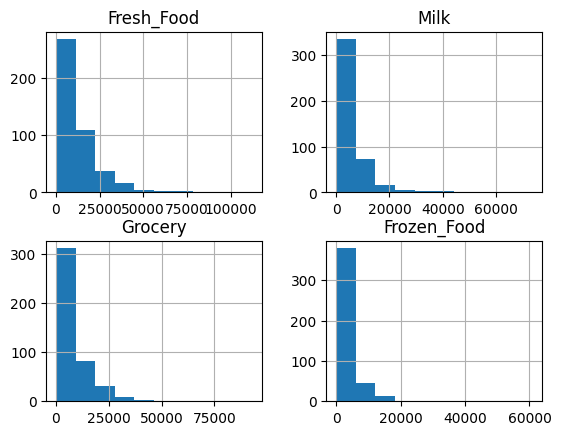

In [10]:
df.hist()

In [11]:
num_clusters= 3
cluster = KMeans(n_clusters = num_clusters)

In [12]:
result = cluster.fit_transform(df)

In [13]:
cluster.cluster_centers_

array([[ 7357.32352941,  4503.07941176,  6442.45294118,  2495.28529412],
       [12841.6       , 26289.36      , 35155.68      ,  3522.36      ],
       [32768.01333333,  4827.68      ,  5723.14666667,  5535.92      ]])

In [15]:
df['cluster_number'] = cluster.predict(df)

In [16]:
df.sample(5)

,Fresh_Food,Milk,Grocery,Frozen_Food,cluster_number
403,25606,11006,4604,127,2
104,14100,2132,3445,1336,0
409,8708,3634,6100,2349,0
123,11170,10769,8814,2194,0
270,4720,1032,975,5500,0


In [18]:
df.cluster_number.value_counts()

cluster_number
0    340
2     75
1     25
Name: count, dtype: int64